<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0624/blob/main/2_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- age     age in years
- sex     
- bmi     body mass index      
- bp      average blood pressure      
- s1      tc, total serum cholesterol      - s2      ldl, low-density lipoproteins      
- s3      hdl, high-density lipoproteins      
- s4      tch, total cholesterol / HDL      
- s5      ltg, possibly log of serum triglycerides level      
- s6      glu, blood sugar level

In [35]:
import pandas as pd
from sklearn.datasets import load_diabetes
raw = load_diabetes(scaled=False)
# pandas兩種型態: DataFrame(2D) Series(1D)
datas = pd.DataFrame(raw["data"], columns=raw["feature_names"])
datas["ans"] = raw["target"]
datas

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ans
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


# 資料多寡

看問題難度決定(x欄位的多寡/y的種類)
1. 機器學習: 幾千筆~幾萬筆
2. 深度學習: 萬筆~幾十萬筆

In [36]:
# pandas操作: drop(注意axis 0or1 橫或直)
# test = pd.DataFrame([
#   [0, 1],
#   [2, 3]
# ], columns=["a", "b"], index=["a", "b"])
# test.drop("a", axis=1)
x = datas.drop("ans", axis=1)
y = datas["ans"]

In [37]:
from sklearn.model_selection import train_test_split
# ctrl + "/": 多行註解
# Demo
# train_test_split([1, 2, 3, 4],
#          [5, 6, 7, 8],
#          [9, 10, 11, 12],
#          test_size=0.25)
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [38]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 's5 <= 4.64\nsquared_error = 5832.818\nsamples = 397\nvalue = 151.715'),
 Text(0.25, 0.5, 'bmi <= 26.95\nsquared_error = 3167.204\nsamples = 208\nvalue = 111.851'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2194.511\nsamples = 163\nvalue = 98.405'),
 Text(0.375, 0.16666666666666666, 'squared_error = 3663.491\nsamples = 45\nvalue = 160.556'),
 Text(0.75, 0.5, 'bmi <= 30.75\nsquared_error = 5092.729\nsamples = 189\nvalue = 195.587'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4455.028\nsamples = 141\nvalue = 177.326'),
 Text(0.875, 0.16666666666666666, 'squared_error = 3108.968\nsamples = 48\nvalue = 249.229')]

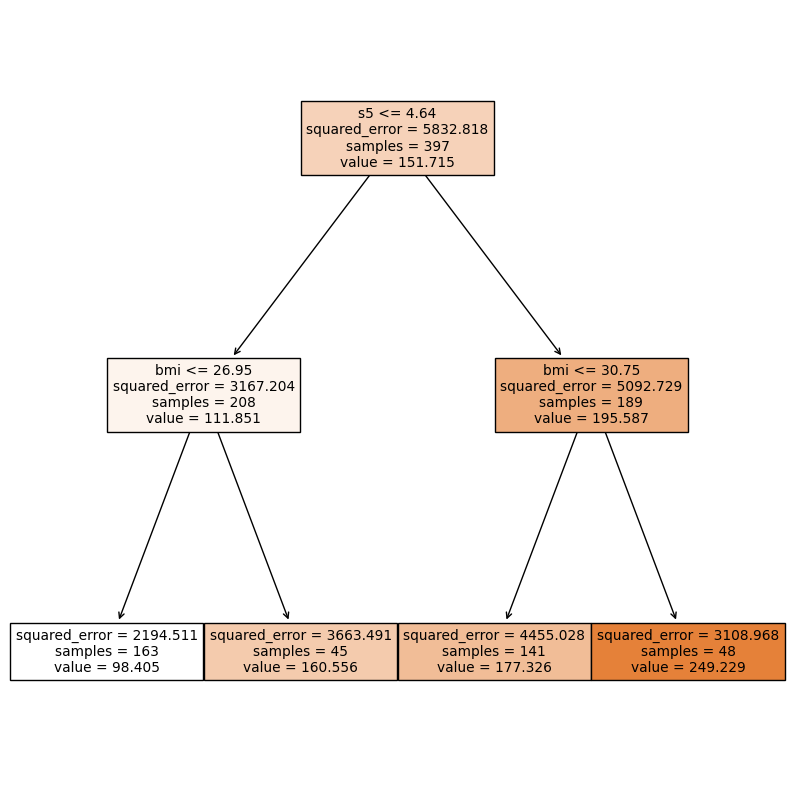

In [39]:
# matplotlib: 所有繪圖基礎
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10, 10])
plot_tree(reg,
     feature_names=raw["feature_names"],
     filled=True)

In [40]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.37132289365685545